In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [2]:
LoanData = pd.read_csv("Loan Data 2.csv")

In [3]:
LD = LoanData[LoanData!= '..']
LD1 = LD.dropna()
# LD1.head()
# LD1.info()
# LD1.describe()
# LD1.columns

/Users/dennisblarsen/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [4]:
LD1['Term'] = pd.to_timedelta(1, unit='M')
LD1['Interest Rate'] = LD1['Interest Rate'].str.rstrip('%').astype('float') / 100.0
LD1['Revolving %'] = LD1['Revolving %'].str.rstrip('%').astype('float') / 100.0
LD1['Employment Length'] = pd.to_timedelta(1, unit='y')
LD1['Employment Length'] = pd.to_timedelta(1, unit='y')

/Users/dennisblarsen/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/dennisblarsen/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/dennisblarsen/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [5]:
LD1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41336 entries, 0 to 41401
Data columns (total 22 columns):
Loan Amount                  41336 non-null int64
Funded Amouint               41336 non-null int64
Term                         41336 non-null timedelta64[ns]
Interest Rate                41336 non-null float64
Installment                  41336 non-null float64
Employment Length            41336 non-null timedelta64[ns]
Home Ownership               41336 non-null object
Annual Income                41336 non-null float64
Approved Date                41336 non-null int64
Loan Status                  41336 non-null object
Purpose                      41336 non-null object
Borrower's State             41336 non-null object
DTI                          41336 non-null float64
Delinquencies last 2-yrs     41336 non-null float64
Earliest Credit Line         41336 non-null object
# Inquiries last 6 months    41336 non-null float64
Open Accounts                41336 non-null float64
Re

In [14]:
#dumb_var = ["Purpose", "Borrower's State", 'Employment Length','Home Ownership',"Loan Status","Employment Length"]
#temp = pd.get_dummies(LD1[dumb_var])
LD2 = pd.concat([LD1, temp], axis=1)
LD2.head()

,Loan Amount,Funded Amouint,Term,Interest Rate,Installment,Employment Length,Home Ownership,Annual Income,Approved Date,Loan Status,...,Borrower's State_WY,Home Ownership_MORTGAGE,Home Ownership_NONE,Home Ownership_OTHER,Home Ownership_OWN,Home Ownership_RENT,Loan Status_Charged Off,Loan Status_Does not meet the credit policy. Status:Charged Off,Loan Status_Does not meet the credit policy. Status:Fully Paid,Loan Status_Fully Paid
0,5000,5000,30 days 10:29:06,0.1065,162.87,365 days 05:49:12,RENT,24000.0,2011,Fully Paid,...,0,0,0,0,0,1,0,0,0,1
1,2500,2500,30 days 10:29:06,0.1527,59.83,365 days 05:49:12,RENT,30000.0,2011,Charged Off,...,0,0,0,0,0,1,1,0,0,0
2,2400,2400,30 days 10:29:06,0.1596,84.33,365 days 05:49:12,RENT,12252.0,2011,Fully Paid,...,0,0,0,0,0,1,0,0,0,1
3,10000,10000,30 days 10:29:06,0.1349,339.31,365 days 05:49:12,RENT,49200.0,2011,Fully Paid,...,0,0,0,0,0,1,0,0,0,1
4,3000,3000,30 days 10:29:06,0.1269,67.79,365 days 05:49:12,RENT,80000.0,2011,Fully Paid,...,0,0,0,0,0,1,0,0,0,1


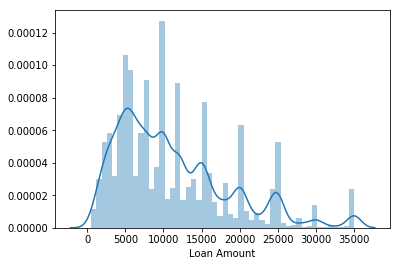

In [11]:
sns.distplot(LD1['Loan Amount'])

In [12]:
LD3 = LD2.corr()

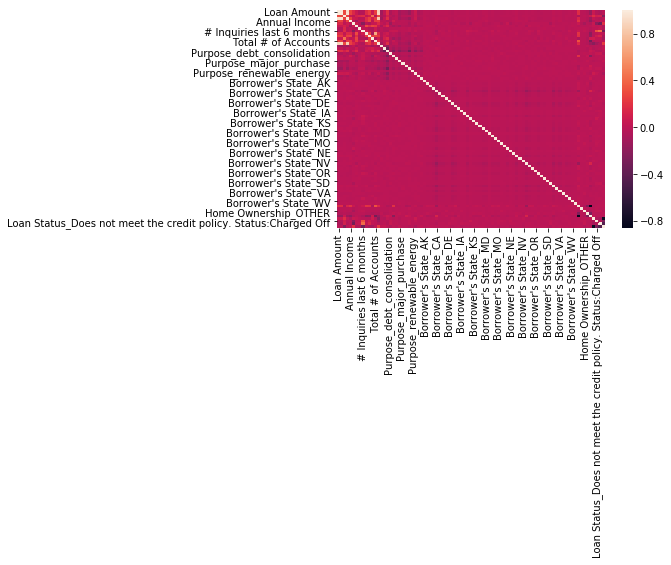

In [13]:
sns.heatmap(LD3)

In [ ]:
X = LD1[['Funded Amouint', 'Installment', 'Annual Income','Loan Amount'
               , 'Delinquencies last 2-yrs','# Inquiries last 6 months', 'Open Accounts', 'Revolving Balance',
         'Total # of Accounts', 'Total Debt Owed']]
y = LD1['DTI']
print(X.shape, y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1000)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

In [ ]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

In [ ]:
predictions = model.predict(X_test)

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model 

In [ ]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
grid.fit(X_train, y_train)